In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_json('/content/drive/MyDrive/bq-results-20240902-020843-1725243014897/practice.json', lines=True)
df.head()

,source_year,year,month,wday,is_male,weight_pounds,plurality,apgar_5min,mother_age,gestation_weeks,...,born_dead,ever_born,father_age,record_weight,mother_race,cigarette_use,alcohol_use,father_race,cigarettes_per_day,drinks_per_week
0,2005,2005,7,6,True,8.811877,1,9.0,34,39.0,...,1.0,8.0,42,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,2005,9,2,True,6.053894,2,9.0,28,35.0,...,0.0,8.0,99,1,2.0,0.0,0.0,99.0,NaN,NaN
2,2005,2005,10,3,False,7.625790,1,7.0,38,39.0,...,1.0,13.0,99,1,2.0,0.0,0.0,99.0,NaN,NaN
3,2005,2005,12,2,True,NaN,1,NaN,35,NaN,...,NaN,NaN,29,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,2005,11,4,True,5.813590,1,9.0,27,41.0,...,3.0,NaN,99,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
type(df.shape)

tuple

In [ ]:
df.index

RangeIndex(start=0, stop=20, step=1)

In [ ]:
df.head()

,Product ID,SKU,Name,Product URL,Price,Retail Price,Thumbnail URL,Search Keywords,Description,Category,...,Size,Shoe Size,Pants Size,Occassion,Season,Badges,Rating Avg,Rating Count,Inventory Count,Date Created
0,7631,HEH-9133,On Cloud Nine Pillow,https://www.domain.com/product/heh-9133,24.99,24.99,https://www.domain.com/images/heh-9133_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Home>Home Decor>Pillows|Back In Stock,...,,,,,,,4.2,8,21,2018-03-03 17:41:13
1,7615,HEH-2245,Simply Sweet Blouse,https://www.domain.com/product/heh-2245,42.00,59.95,https://www.domain.com/images/heh-2245_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Clothing>Tops>Blouses|Clearance|Tops On Sale,...,Small|Medium,,,,Summer|Spring,Exclusive|Clearance,4.5,10,8,2018-03-20 22:24:21
2,8100,WKS-6016,Uptown Girl Blouse,https://www.domain.com/product/wks-6016,58.00,89.95,https://www.domain.com/images/wks-6016_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Clothing>Tops>Blouses,...,Medium,,,,Summer|Spring,Exclusive,4.2,11,9,2018-03-16 21:55:28
3,6489,DKO-PROF,Knock Your Socks Off Lace-Up Heels,https://www.domain.com/product/dko-prof,38.00,60.00,https://www.domain.com/images/dko-prof_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Shoes>Heels>Lace-Up Heels|Featured Products|Sh...,...,,5|5.5|6|7|7.5,,,,Featured,4.9,4,19,2018-02-28 23:37:28
4,7732,HEH-2172,My Cup of Tea Sweater,https://www.domain.com/product/heh-2172,68.00,68.00,https://www.domain.com/images/heh-2172_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Clothing>Tops>Sweaters,...,Medium|Large,,,,Winter,,4.6,22,3,2018-03-01 20:18:20


In [ ]:
df[(df['Product ID'] > 7000) & (df['Price']==24.99)]

,Product ID,SKU,Name,Product URL,Price,Retail Price,Thumbnail URL,Search Keywords,Description,Category,...,Size,Shoe Size,Pants Size,Occassion,Season,Badges,Rating Avg,Rating Count,Inventory Count,Date Created
0,7631,HEH-9133,On Cloud Nine Pillow,https://www.domain.com/product/heh-9133,24.99,24.99,https://www.domain.com/images/heh-9133_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Home>Home Decor>Pillows|Back In Stock,...,,,,,,,4.2,8,21,2018-03-03 17:41:13


In [ ]:
contains = df['Name'].apply(lambda x: 'On Cloud Nine Pillow'in x)
df[contains]

,Product ID,SKU,Name,Product URL,Price,Retail Price,Thumbnail URL,Search Keywords,Description,Category,...,Size,Shoe Size,Pants Size,Occassion,Season,Badges,Rating Avg,Rating Count,Inventory Count,Date Created
0,7631,HEH-9133,On Cloud Nine Pillow,https://www.domain.com/product/heh-9133,24.99,24.99,https://www.domain.com/images/heh-9133_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Home>Home Decor>Pillows|Back In Stock,...,,,,,,,4.2,8,21,2018-03-03 17:41:13


In [ ]:
contains = df['Price'].apply(lambda x: (x == 24.99) | (x  in [42,58]))
df[contains]

,Product ID,SKU,Name,Product URL,Price,Retail Price,Thumbnail URL,Search Keywords,Description,Category,...,Size,Shoe Size,Pants Size,Occassion,Season,Badges,Rating Avg,Rating Count,Inventory Count,Date Created
0,7631,HEH-9133,On Cloud Nine Pillow,https://www.domain.com/product/heh-9133,24.99,24.99,https://www.domain.com/images/heh-9133_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Home>Home Decor>Pillows|Back In Stock,...,,,,,,,4.2,8,21,2018-03-03 17:41:13
1,7615,HEH-2245,Simply Sweet Blouse,https://www.domain.com/product/heh-2245,42.00,59.95,https://www.domain.com/images/heh-2245_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Clothing>Tops>Blouses|Clearance|Tops On Sale,...,Small|Medium,,,,Summer|Spring,Exclusive|Clearance,4.5,10,8,2018-03-20 22:24:21
2,8100,WKS-6016,Uptown Girl Blouse,https://www.domain.com/product/wks-6016,58.00,89.95,https://www.domain.com/images/wks-6016_600x600...,"lorem, ipsum, dolor, ...",Sociosqu facilisis duis ...,Clothing>Tops>Blouses,...,Medium,,,,Summer|Spring,Exclusive,4.2,11,9,2018-03-16 21:55:28


In [ ]:
df_sales= pd.read_csv ('/content/sales_subset.csv', index_col=False)

In [ ]:
df_sales= df_sales.drop(columns=['Unnamed: 0'])

In [ ]:
df_sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


Explore your new DataFrame first by printing the first few rows of the sales DataFrame.

**Print information about the columns in sales.**


In [ ]:
df_sales[["date", "weekly_sales"]]

,date,weekly_sales
0,2010-02-05,24924.50
1,2010-03-05,21827.90
2,2010-04-02,57258.43
3,2010-05-07,17413.94
4,2010-06-04,17558.09
...,...,...
10769,2011-12-09,895.00
10770,2012-02-03,350.00
10771,2012-06-08,450.00
10772,2012-07-13,0.06


**Print the mean of the weekly_sales column**

In [ ]:
df_sales["weekly_sales"].mean()

23843.95014850566

**Print the median of the weekly_sales column.**

In [ ]:
df_sales["weekly_sales"].median()

12049.064999999999

**Print the maximum of the date column.**



In [ ]:
df_sales["date"].max()

'2012-10-26'

**Print the minimum of the date column.**

In [ ]:
df_sales["date"].min()

'2010-02-05'


**Use the custom iqr function defined for you along with .agg() to print the IQR of the temperature_c column of sales.**
**Update the column selection to use the custom iqr function with .agg() to print the IQR of temperature_c, fuel_price_usd_per_l, and unemployment, in that order**.
**Update the aggregation functions called by .agg(): include iqr and np.median in that order.**

In [ ]:
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [ ]:
df_sales['temperature_c'].agg(iqr)

16.583333333333336

In [ ]:
df_sales[["temperature_c", "fuel_price_usd_per_l","unemployment"]].agg(iqr)

,0
temperature_c,16.583333
fuel_price_usd_per_l,0.073176
unemployment,0.565000


In [ ]:
df_sales[["temperature_c", "fuel_price_usd_per_l","unemployment"]].agg([iqr, np.median])

,temperature_c,fuel_price_usd_per_l,unemployment
iqr,16.583333,0.073176,0.565
median,16.966667,0.743381,8.099


In [ ]:
df_sales

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


**Remove rows of sales with duplicate pairs of store and type and save as store_types and print the head.**
**Remove rows of sales with duplicate pairs of store and department and save as store_depts and print the head.**
**Subset the rows that are holiday weeks using the is_holiday column, and drop the duplicate dates, saving as holiday_dates.**
**Select the date column of holiday_dates, and print.**

In [ ]:
store_types = df_sales.drop_duplicates(subset = ['store', 'type'])
store_types.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [ ]:
store_depts = df_sales.drop_duplicates(subset = ['store', 'department'])
store_depts.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [ ]:
df_sales[df_sales['is_holiday'] == True].drop_duplicates(subset = 'date')

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
498,1,A,45,2010-09-10,11.47,True,25.938889,0.677602,7.787
691,1,A,77,2011-11-25,1431.00,True,15.633333,0.854861,7.866
2315,4,A,47,2010-02-12,498.00,True,-1.755556,0.679715,8.623
6735,19,A,39,2012-09-07,13.41,True,22.333333,1.076766,8.193
6810,19,A,47,2010-12-31,-449.00,True,-1.861111,0.881278,8.067
6815,19,A,47,2012-02-10,15.00,True,0.338889,1.010723,7.943
6820,19,A,48,2011-09-09,197.00,True,20.155556,1.038197,7.806


In [ ]:
holiday_dates = df_sales[df_sales['is_holiday'] == True].drop_duplicates(subset = 'date')
holiday_dates['date'].value_counts()

,count
date,
2010-09-10,1
2011-11-25,1
2010-02-12,1
2012-09-07,1
2010-12-31,1
2012-02-10,1
2011-09-09,1


**Calculate the total weekly_sales over the whole dataset.**
**Subset for type "A" stores, and calculate their total weekly sales. **
**Do the same for type "B" and type "C" stores.**
**Combine the A/B/C results into a list, and divide by sales_all to get the proportion of sales by type.**

In [ ]:
df_sales['weekly_sales'].sum()

256894718.89999998

In [ ]:
sales_A = df_sales[df_sales['type'] == "A"]['weekly_sales'].sum()
sales_A

233716315.01

In [ ]:
# Subset for type B stores, calc total weekly sales
sales_B = df_sales[df_sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = df_sales[df_sales["type"] == "C"]["weekly_sales"].sum()

sales_all = df_sales["weekly_sales"].sum()
# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


**Group sales by "type", take the sum of "weekly_sales", and store as sales_by_type.**
**Calculate the proportion of sales at each store type by dividing by the sum of sales_by_type. Assign to sales_propn_by_type.**

In [ ]:
sales_by_type = df_sales.groupby('type')['weekly_sales'].sum()

In [ ]:
sales_popn_by_type = sales_by_type/ sum(sales_by_type)
print(sales_popn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


**Get the min, max, mean, and median of weekly_sales for each store type using .groupby() and .agg(). Store this as sales_stats. Make sure to use numpy functions!**
**Get the min, max, mean, and median of unemployment and fuel_price_usd_per_l for each store type. Store this as unemp_fuel_stats.**

In [ ]:
sales_stats = df_sales.groupby('type')['weekly_sales'].agg([min, max, 'mean', 'median'])

In [ ]:
sales_stats

,min,max,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [ ]:
unemp_fuel_stats = df_sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l' ]].agg([min, max, 'mean', 'median'])

In [ ]:
unemp_fuel_stats

unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

**Get the mean weekly_sales by type using .pivot_table() and store as mean_sales_by_type.**
**2 Get the mean and median (using NumPy functions) of weekly_sales by type using .pivot_table() and store as mean_med_sales_by_type.**
**3 Get the mean of weekly_sales by type and is_holiday using .pivot_table() and store as mean_sales_by_type_holiday.**

In [ ]:
mean_sales_by_type = df_sales.pivot_table(values= 'weekly_sales', index='type', aggfunc='mean')

In [ ]:
mean_sales_by_type

,weekly_sales
type,
A,23674.667242
B,25696.678370


In [ ]:
mean_med_sales_by_type = df_sales.pivot_table(values= 'weekly_sales', index='type', aggfunc=['mean', 'median'])

In [ ]:
mean_med_sales_by_type

,mean,median
,weekly_sales,weekly_sales
type,,
A,23674.667242,11943.92
B,25696.678370,13336.08


In [ ]:
 mean_sales_by_type_holiday = df_sales.pivot_table(values="weekly_sales", index="type", columns= 'is_holiday', aggfunc='mean')

In [ ]:
 mean_sales_by_type_holiday

is_holiday,False,True
type,,
A,23768.583523,590.04525
B,25751.980533,810.70500


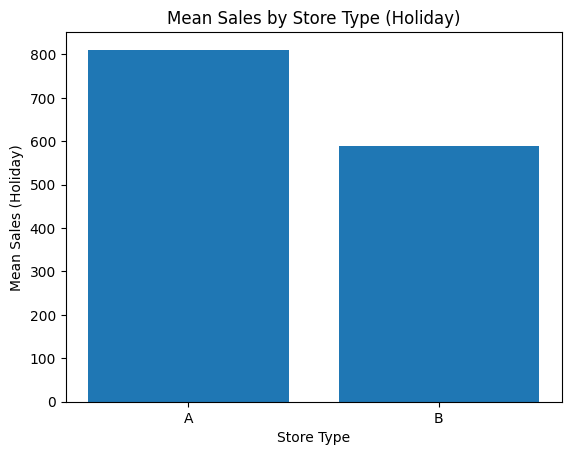

In [ ]:
# @title Mean Sales by Store Type (Holiday)

import matplotlib.pyplot as plt

# Sample data (replace with actual data)
data = {'type': ['A', 'B'], 'mean_sales_holiday': [810.705, 590.04525]}

plt.bar(data['type'], data['mean_sales_holiday'])
plt.xlabel('Store Type')
plt.ylabel('Mean Sales (Holiday)')
_ = plt.title('Mean Sales by Store Type (Holiday)')

**Print the mean weekly_sales by department and type, filling in any missing values with 0.**
**2 Print the mean weekly_sales by department and type, filling in any missing values with 0 and summing all rows and columns**

In [ ]:
mean_weekly_sales= df_sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0, margins=True)

In [ ]:
mean_weekly_sales

type,A,B,All
department,,,
1,30961.725379,44050.626667,32052.467153
2,67600.158788,112958.526667,71380.022778
3,17160.002955,30580.655000,18278.390625
4,44285.399091,51219.654167,44863.253681
5,34821.011364,63236.875000,37189.000000
...,...,...,...
96,21367.042857,9528.538333,20337.607681
97,28471.266970,5828.873333,26584.400833
98,12875.423182,217.428333,11820.590278


**Create a list called cities that contains "Moscow" and "Saint Petersburg".**
**Use [] subsetting to filter temperatures for rows where the city column takes a value in the cities list**.
**Use .loc[] subsetting to filter temperatures_ind for rows where the city is in the cities list.**

In [ ]:
df_temp = pd.read_csv('/content/temperatures.csv')
df_temp = df_temp.drop(columns='Unnamed: 0')

In [ ]:
cities = ['Moscow', 'Saint Petersburg']
df_temp[df_temp['city'].isin(cities)]

,date,city,country,avg_temp_c
10725,2000-01-01,Moscow,Russia,-7.313
10726,2000-02-01,Moscow,Russia,-3.551
10727,2000-03-01,Moscow,Russia,-1.661
10728,2000-04-01,Moscow,Russia,10.096
10729,2000-05-01,Moscow,Russia,10.357
...,...,...,...,...
13360,2013-05-01,Saint Petersburg,Russia,12.355
13361,2013-06-01,Saint Petersburg,Russia,17.185
13362,2013-07-01,Saint Petersburg,Russia,17.234
13363,2013-08-01,Saint Petersburg,Russia,17.153


In [ ]:
df_temp.set_index('city', inplace=True)

In [ ]:
df_temp.loc[cities]

,date,country,avg_temp_c
city,,,
Moscow,2000-01-01,Russia,-7.313
Moscow,2000-02-01,Russia,-3.551
Moscow,2000-03-01,Russia,-1.661
Moscow,2000-04-01,Russia,10.096
Moscow,2000-05-01,Russia,10.357
...,...,...,...
Saint Petersburg,2013-05-01,Russia,12.355
Saint Petersburg,2013-06-01,Russia,17.185
Saint Petersburg,2013-07-01,Russia,17.234


**It's also useful to be able to sort by elements in the index. For this, you need to use .sort_index().**

**pandas is loaded as pd. temperatures_ind has a multi-level index of country and city, and is available.**

In [ ]:
df_temp.sort_index(level='city')

,date,country,avg_temp_c
city,,,
Abidjan,2000-01-01,Côte D'Ivoire,27.293
Abidjan,2008-11-01,Côte D'Ivoire,27.302
Abidjan,2008-12-01,Côte D'Ivoire,27.472
Abidjan,2009-01-01,Côte D'Ivoire,26.912
Abidjan,2009-02-01,Côte D'Ivoire,28.224
...,...,...,...
Xian,2004-09-01,China,17.889
Xian,2004-10-01,China,11.229
Xian,2004-11-01,China,5.720


In [ ]:
print(df_temp.sort_index(level=["country", "city"], ascending = [True]))

               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2008-11-01  Côte D'Ivoire      27.302
Abidjan  2008-12-01  Côte D'Ivoire      27.472
Abidjan  2009-01-01  Côte D'Ivoire      26.912
Abidjan  2009-02-01  Côte D'Ivoire      28.224
...             ...            ...         ...
Xian     2004-09-01          China      17.889
Xian     2004-10-01          China      11.229
Xian     2004-11-01          China       5.720
Xian     2005-01-01          China      -2.209
Xian     2013-09-01          China         NaN

[16500 rows x 3 columns]


In [ ]:
import pickle
import matplotlib.pyplot as plt

In [ ]:
with open('/content/sample_data/datasets/avoplotto.pkl', mode='rb') as f:
    data = pickle.load(f)

In [ ]:
data

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


Print the head of the avocados dataset. What columns are available?
For each avocado size group, calculate the total number sold, storing as nb_sold_by_size.
Create a bar plot of the number of avocados sold by size.
Show the plot.

In [ ]:
data.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [ ]:
data.columns

Index(['date', 'type', 'year', 'avg_price', 'size', 'nb_sold'], dtype='object')

In [ ]:
nb_sold_by_size = data.groupby('size')['nb_sold'].sum()

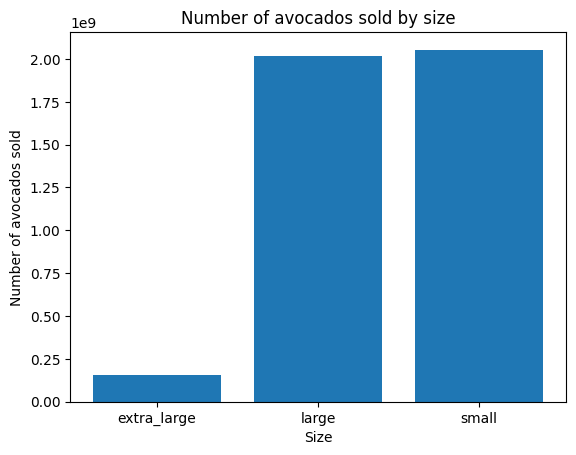

In [ ]:
plt.bar(nb_sold_by_size.index, nb_sold_by_size)
plt.xlabel('Size')
plt.ylabel('Number of avocados sold')
plt.title('Number of avocados sold by size')
plt.show()


**Get the total number of avocados sold on each date. The DataFrame has two rows for each date—one for organic, and one for conventional. Save this as nb_sold_by_date.**


In [ ]:
data.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [ ]:
data.set_index('type', inplace=True)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
nb_conventional_sold_by_date = data.loc['conventional'].groupby('date')['nb_sold'].sum()

In [ ]:
nb_organic_sold_by_date = data.loc['organic'].groupby('date')['nb_sold'].sum()

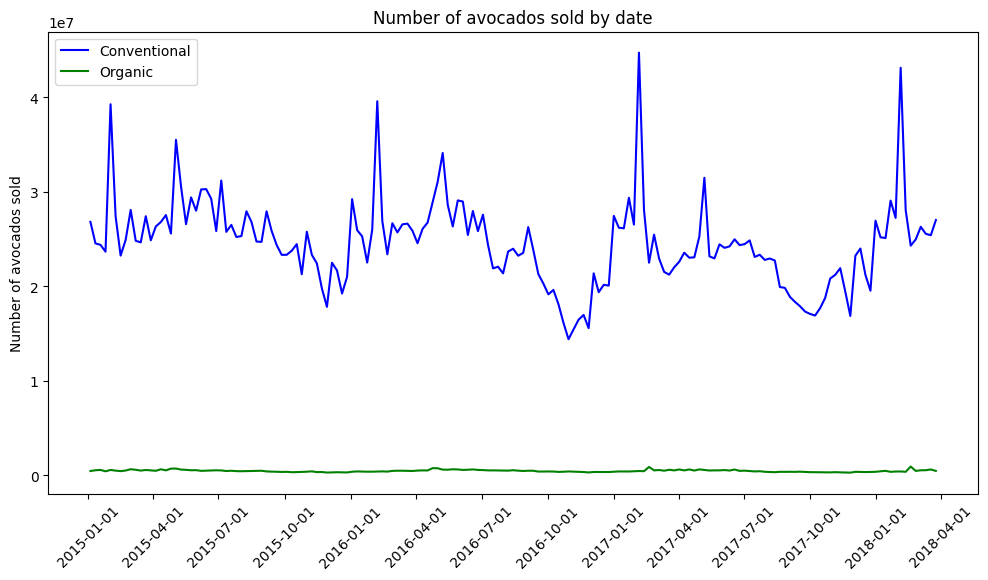

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(nb_conventional_sold_by_date.index, nb_conventional_sold_by_date, label='Conventional', color='blue')
plt.plot(nb_organic_sold_by_date.index, nb_organic_sold_by_date, label='Organic', color='green')

# Set x-axis major locator to a specified interval
locator = mdates.MonthLocator(interval=3)  # Change interval as needed
plt.gca().xaxis.set_major_locator(locator)

# Set x-axis major formatter to display dates clearly
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.ylabel('Number of avocados sold')
plt.title('Number of avocados sold by date')
plt.legend()
plt.show()

Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis. Title it "Number of avocados sold vs. average price".
Show the plot.

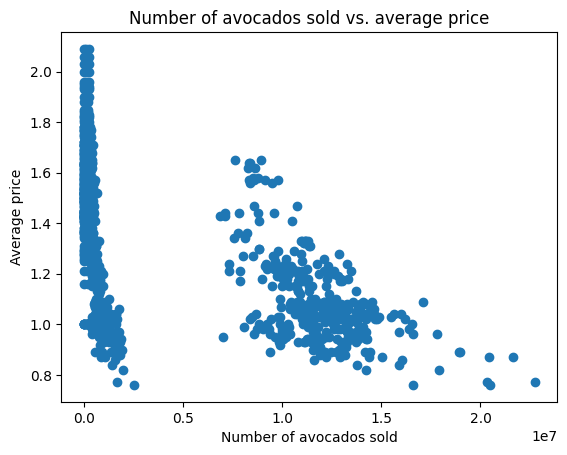

In [ ]:
plt.scatter(data['nb_sold'], data['avg_price'])
plt.xlabel('Number of avocados sold')
plt.ylabel('Average price')
plt.title('Number of avocados sold vs. average price')
plt.show()

Subset avocados for the "conventional" type and create a histogram of the avg_price column.
Create a histogram of avg_price for "organic" type avocados.
Add a legend to your plot, with the names "conventional" and "organic".
Show your plot.

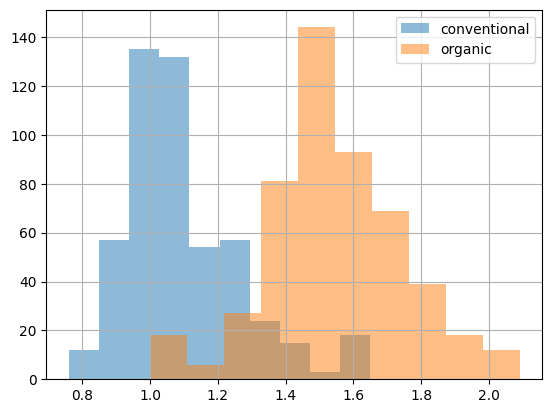

In [ ]:
data.loc['conventional']['avg_price'].hist(alpha=0.5)
data.loc['organic']['avg_price'].hist(alpha=0.5)
plt.legend(['conventional', 'organic'])
plt.show()

Check for Matching condition

In [ ]:
import pandas as pd

def calculate_special_bonus(employees: pd.DataFrame) -> pd.DataFrame:
    condition = (employees['employee_id']%2 != 0) & (~employees['name'].str.startswith('M'))
    employees['bonus'] = employees['salary'].where(condition, 0)
    return employees[['employee_id', 'bonus']].sort_values(by ='employee_id')

Check for Missing values after merging two tables

In [ ]:
import pandas as pd

def find_customers(customers: pd.DataFrame, orders: pd.DataFrame) -> pd.DataFrame:
    new_df = customers.merge(orders, left_on='id', right_on='customerId', how='outer')
    missing_customers = new_df[new_df['customerId'].isna()]
    return missing_customers[['name']].rename(columns={'name':'Customers'})


Using apply function to modify rows based on matching criteria


In [ ]:
def calculate_bonus(row):
    if (row['employee_id'] % 2 != 0) and not row['name'].startswith('M'):
        return row['salary']
    return 0

# Apply the function to each row
employees['bonus'] = employees.apply(calculate_bonus, axis=1)

2. Break Down the Problem
Divide the description into smaller, manageable parts:

Prefix and Suffix: Identify what should be at the beginning and end of the string.
Character Classes: Determine the sets of characters that are valid.
Separators and Delimiters: Recognize any separators or specific delimiters.
Length and Repetition: Determine if there are constraints on the length of specific parts.
3. Construct the Regex Pattern
Using the information from the breakdown, build the regex pattern step by step:

Start and End Anchors:

Use ^ to assert the position at the start of the string.
Use $ to assert the position at the end of the string.
Character Classes:

Use [] to define a set of allowed characters (e.g., [a-zA-Z] for letters).
Quantifiers:

Use * (zero or more), + (one or more), ? (zero or one), {n,m} (between n and m).
Special Characters:

Use \ to escape special characters like ..
Grouping and Alternation:

Use () to group parts of the pattern.
Use | for alternatives.

The regex pattern r'^[a-zA-Z][\w\.-]*@leetcode\.com$' matches email addresses that:

Start with a letter.
Followed by any number of word characters, periods, or dashes.
End with the exact domain @leetcode.com

In [ ]:
import pandas as pd

def valid_emails(users: pd.DataFrame) -> pd.DataFrame:
    return users[users['mail'].str.match(r'^[a-zA-Z][\w\.-]*@leetcode\.com```)]

Nth highest salary

In [ ]:
import pandas as pd

def nth_highest_salary(employee: pd.DataFrame, N: int) -> pd.DataFrame:
    sorted_employees = employee[['salary']].drop_duplicates().sort_values(by='salary', ascending=False).reset_index(drop=True)

    if N > len(sorted_employees) or N <= 0:
        column_name = f'getNthHighestSalary({N})'
        df = pd.DataFrame([None], columns=[column_name])
    else:
        # Get the nth highest salary
        nth_highest = sorted_employees['salary'].iloc[N-1]
        column_name = f'getNthHighestSalary({N})'
        df = pd.DataFrame([nth_highest], columns=[column_name])

    return df


Rearrange Products Table: Using unpivot and melt

In [ ]:
import pandas as pd

def rearrange_products_table(products: pd.DataFrame) -> pd.DataFrame:
    return pd.melt(
        products, id_vars='product_id', var_name='store', value_name='price'
    ).dropna()


Convert groupby to dataframe
reset_index(): Converts the grouped keys back into columns.
to_frame(): Converts a Series groupby object into a DataFrame.
apply(): Allows custom functions to be applied and returns a DataFrame.
agg()



Unique values in another column based on one column

In [ ]:
def count_unique_subjects(teacher: pd.DataFrame) -> pd.DataFrame:
    return (
        teacher.groupby('teacher_id', as_index=False)
        .agg(cnt = ('subject_id', 'nunique'))
    )